# 5. 펭귄 종 분류 [펭귄의 '특성'을 통한 종 예측]

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


지구 온난화의 피해를 유독 많이 입고 있는 동물이 있다. 바로 펭귄이다. 남극의 해빙(바다 얼음) 감소뿐만 아니라 기온 변화로 인해 눈보다 비가 내리는 날이 많아 방수 기능이 없는 솜털을 가진 새끼 펭귄들이 저체온증으로 목숨을 잃는 것이다.

생존을 위협받는 펭귄을 보호하고 관찰하기 위해 종 분류가 필요하다. 여기서는 펭귄에 관한 몇 가지 간단한 수치 데이터만으로 종을 분류하는 인공지능을 만들어 본다.



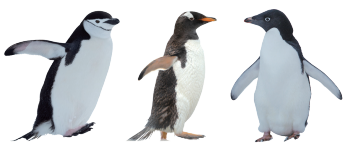

- 지도 학습 분류 알고리즘 중 SVM(Support Vector Machine)에 대하여 이해한다.

- 모델 제작을 통해 이항 분류와 다항 분류를 비교·분석한다.

**<해결 모델은?>**

지도 학습 중 분류 알고리즘인 **SVM(Support Vector Machine)**에 대하여 탐구하고,

펭귄 데이터를 학습한 후 딥러닝으로도 발전시켜 **이항 분류와 다항 분류의 차이점**을 파악한다.

# [개념] 인공지능 알고리즘

지도 학습 중 분류 알고리즘에 속하는 SVM(Support Vector Machine, 서포트 벡터 머신)에 대하여 알아보자.

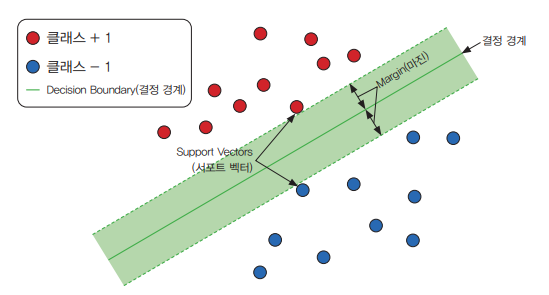

경계가 되는 두 벡터(Support Vector)를 선정하고 중간에 결정 경계를 구한다.

그러면 그 결정 경계를 중심으로 클래스(class)가 분류되는 것이다.

결정 경계와 벡터 사이의 거리를 ‘Margin(마진)’이라고 하고

두 점 사이의 거리를 구하는 ‘유클리드 거리 공식’과

점과 직선 사이 거리를 구하는 공식을 바탕으로 두 벡터와 결정 경계를 구한다.

# [실습]

## 데이터 불러오고 '결측치' 확인하기

펭귄 데이터(penguins.csv)는 코드의 구글 다이렉트 다운로드 링크 또는 삼양미디어 고객센터 자료실(http://samyangm.com/shop/bbs/board.php?bo_table=shop_data)
에서 받을 수 있다.

데이터 처리에 필요한 모듈을 불러와서 펭귄 데이터를 읽고 head() 메소드로 상위 5개 데이터를 확인한다.

필요 라이브러리
 - pandas
 - numpy
 - matplolib 중 pyplot
 - seaborn

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
#펭귄 데이터 불러오기
# df = pd.read_csv("https://drive.google.com/uc?export=download&id=1YlKB81mzkV_udQXVHgam_PqAeMsxnXTi")
df = pd.read_csv("/content/drive/MyDrive/machinelearning11-main/02_03. 펭귄 종 분류 데이터/penguins.csv")

In [4]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


위 데이터는 미국의 팔머 연구소(palmer station)에서 수집한 총 344마리의 펭귄 정보 데이터로,

종(species), 서식지(island), 부리의 길이(bill_length_mm), 부리의 두께(bill_depth_mm), 물갈퀴의 길이(flipper_length_mm)와 체중(body_mass_g), 성별(sex)이 담겨 있다

value_counts()를 활용하여 몇 가지 속성별로 데이터 개수를 출력하면

아델리 펭귄(Adelie Penguin), 젠투 펭귄(Gentoo Penguin), 턱끈 펭귄(Chinstrap Penguin) 세 가지 종이 있고

Biscoe, Dream, Torgersen 세 군데 서식지가 있음을 알 수 있다.

In [5]:
#종 카운트
df["species"].value_counts()

,count
species,
Adelie,152
Gentoo,124
Chinstrap,68


In [6]:
#서식지 카운트
df["island"].value_counts()

,count
island,
Biscoe,168
Dream,124
Torgersen,52


In [7]:
#성별 카운트
df['sex'].value_counts()

,count
sex,
male,168
female,165


위에서 성별로 데이터 수를 출력했을 때 수컷, 암컷은 균등하게 존재하지만,

총 개수가 344마리가 아닌 333마리로 출력되므로 결측치가 있음을 알 수 있다.

<Axes: xlabel='species', ylabel='body_mass_g'>

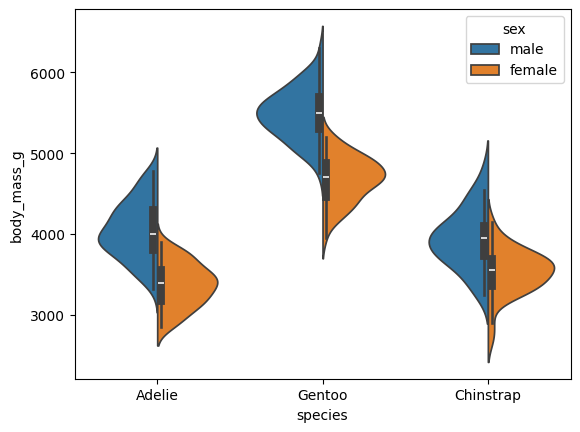

In [8]:
#데이터 시각화
sns.violinplot(x='species', y='body_mass_g', hue="sex", data=df, split=True)

시본의 **바이올린플롯**(violinplot, 데이터의 분포와 범위를 시각화하는 그래프 형식)을 이용해 데이터를 카테고리별로 살펴보자.

대체로 암컷보다는 수컷이, 다른 종보다는 젠투 펭귄이

체중이 더 많이 나가는 것을 확인할 수 있다.

## 데이터 전처리하기

각 속성마다 결측치가 몇 개인지 파악하고

속성 한 개(bill_length_mm)를 골라 NaN 값이 있는 데이터를 출력해 보자

In [9]:
#결측치 개수
df.isnull().sum()

,0
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11


In [10]:
df[df['bill_depth_mm'].isnull()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
271,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [11]:
#결측치 파악
df.isnull().sum()

,0
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11


3번 행과 271번 행의 데이터는 종과 서식지를 제외한 모든 데이터가 NaN 값으로 이루어져 있다.

그래서 이 2개의 데이터를 **dropna(  )**로 제거하면 성별을 제외한 다른 속성의 NaN 값이 모두 사라진다.

그리고 성별이 분명하지 않은 나머지 9개의 데이터는

**fillna(  )** 함수로 ‘unknow’를 넣어준다.

In [12]:
#결측치 제거
df.dropna(subset=['bill_length_mm'], inplace=True) #subset열의 nan이 있는 행 삭제

#해당 행의 인덱스 번호가 삭제된다. 원하면 인덱스 리셋을 해주면 된다.
#df.reset_index(drop=True, inplace=True) <-이렇게

In [13]:
#결측치 '모름'으로 채우기
df['sex'] = df['sex'].fillna('unknow')

In [14]:
df.count()

,0
species,342
island,342
bill_length_mm,342
bill_depth_mm,342
flipper_length_mm,342
body_mass_g,342
sex,342


In [15]:
df.isnull().sum()

,0
species,0
island,0
bill_length_mm,0
bill_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


다음으로 데이터를 학습하기 알맞은 형태로 처리해 주어야 한다.

문자로 이루어진 데이터는 학습을 위해 숫자로 라벨링해 준다.

특정 데이터를 특정 값으로 매핑해주는 map(  ) 함수로

펭귄의 종, 서식지, 성별 데이터를 불러와 각각 0, 1, 2로 라벨링해 준다.

In [16]:
#데이터 라벨링
df['species'] = df['species'].map({"Adelie":0, "Gentoo":1, "Chinstrap":2})
df['island'] = df['island'].map({"Biscoe":0, "Dream":1, "Torgersen":2})
df['sex'] = df['sex'].map({"male":0, "female":1, "unknow":2})

In [17]:
#라벨링 된 데이터 확인
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,0
1,0,2,39.5,17.4,186.0,3800.0,1
2,0,2,40.3,18.0,195.0,3250.0,1
4,0,2,36.7,19.3,193.0,3450.0,1
5,0,2,39.3,20.6,190.0,3650.0,0


[종속 변수와 독립 변수 구분]

[훈련 데이터와 테스트 데이터로 분리(8:2)]

예측할 결과값이 펭귄의 종이므로

종(species)을 Y(종속 변수)에, 나머지를 X(독립 변수)에 담아 준다.

하지만 서식지는 분류하고 활용하는 데 큰 의미가 없어 제외한다.

즉, 펭귄의 부리 길이, 부리 두께, 물갈퀴 길이, 체중, 성별로

펭귄의 종을 분류하는 인공지능을 만들기 위해 데이터를 분리해 준다

In [18]:
df.count()

,0
species,342
island,342
bill_length_mm,342
bill_depth_mm,342
flipper_length_mm,342
body_mass_g,342
sex,342


In [19]:
#학습데이터 평가데이터 나누기(종속 변수와 독립 변수의 구분)
dataset = df.values
X = dataset[ :, 2:] # 전체 행, 2번째~ 칼럼
Y = dataset[ : , 0] #전체 행, 0번째 칼럼
X = np.asarray(X)    #넘파이 배열로 변환

In [20]:
X

array([[3.910e+01, 1.870e+01, 1.810e+02, 3.750e+03, 0.000e+00],
       [3.950e+01, 1.740e+01, 1.860e+02, 3.800e+03, 1.000e+00],
       [4.030e+01, 1.800e+01, 1.950e+02, 3.250e+03, 1.000e+00],
       ...,
       [4.960e+01, 1.820e+01, 1.930e+02, 3.775e+03, 0.000e+00],
       [5.080e+01, 1.900e+01, 2.100e+02, 4.100e+03, 0.000e+00],
       [5.020e+01, 1.870e+01, 1.980e+02, 3.775e+03, 1.000e+00]])

In [21]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

## SVM 모델 학습하기(머신러닝)

사이킷런에서 제공하는 **SVM(Support Vector Machine) 알고리즘**을 호출한 후

X_train과 Y_train 훈련 데이터로 학습시킨다.

SVC는 SVM의 끝 단어 Machine을 Classification(분류)으로 바꾼 것이다.

**SVM 알고리즘의 핵심은 Vector 경계인 선을 찾는 것**인데

부리의 길이, 부리의 두께, 물갈퀴의 길이, 체중, 성별 등

속성의 개수가 늘어날수록 선의 차원이 늘어간다.

**차원이 늘어날수록 계산량이 증가**하는 부작용이 생기고

**이를 해결해 주는 것이 ‘커널(kernel) 함수’**이다.

커널 함수는 분류를 위한 경계를 찾기 위해 적절한 형태로 변환해 계산량 증가를 막아 준다.

커널은 선형(linear)과 비선형(rbf, radial basis function)을 많이 사용한다.

선형 분류가 효율적이고 잘 작동하지만 작동하지 않을 경우 비선형으로 분류한다

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=3)

In [23]:
import sklearn.svm as svm
svm_model = svm.SVC(kernel='linear')

In [24]:
svm_model.fit(X_train, Y_train)

SVC(kernel='linear')

학습이 끝난 SVM 모델의 정확도를 보니 100%가 나왔다.

또한 X_test로 예측한 결과와 실제 값(Y_test) 상위 10개 데이터를 비교해 보니 전부 맞았다

In [25]:
svm_model.score(X_train, Y_train)

1.0

In [26]:
Y_prediction = svm_model.predict(X_test).flatten() #1차원 배열
for i in range(10):
  label = Y_test[i]
  prediction = Y_prediction[i]
  print("실제: {:.0f}, 예측: {:.0f}".format(label,prediction))

실제: 2, 예측: 2
실제: 2, 예측: 2
실제: 2, 예측: 2
실제: 0, 예측: 0
실제: 1, 예측: 1
실제: 0, 예측: 0
실제: 1, 예측: 1
실제: 2, 예측: 2
실제: 0, 예측: 0
실제: 1, 예측: 1


혼동 행렬과 구체적인 정밀도를 살펴보자. SVM 역시 0번(아델리 펭귄)을 예측한 정밀도(precision)가 다른 종 분류보다 낮지만 정밀도는 94%이고, 나머지 두 종의 분류 정밀도는 100%로 평균 97%의 높은 정밀도로 분류하였다.

In [27]:
from sklearn.metrics import classification_report, confusion_matrix
svm_prediction = svm_model.predict(X_test)
print('혼동 행렬\n', confusion_matrix(Y_test, svm_prediction))
print('\n평가 지표\n', classification_report(Y_test, svm_prediction))

혼동 행렬
 [[29  0  0]
 [ 0 24  0]
 [ 2  0 14]]

평가 지표
               precision    recall  f1-score   support

         0.0       0.94      1.00      0.97        29
         1.0       1.00      1.00      1.00        24
         2.0       1.00      0.88      0.93        16

    accuracy                           0.97        69
   macro avg       0.98      0.96      0.97        69
weighted avg       0.97      0.97      0.97        69



여기서 recall 은 정확도로, 29+24+14 / 29+24+14

## 다항 분류 모델 학습하기(딥러닝)

다항 분류 딥러닝은 훈련 데이터로 학습을 끝마치면

각각 카테고리로 분류 예측 정도를 나타내는 벡터 값이 출력된다.

그 세 가지 벡터 값 중에서 가장 큰 값이 있는 카테고리로 분류하는 것이다.

그러기 위해서는 독립 변수 값이 0이나 1, 2와 같은 값이 아닌

3개의 값을 담을 수 있는 리스트 형태이어야 한다

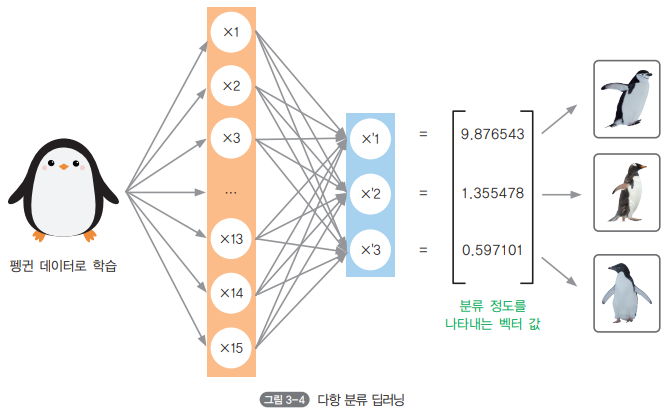

np_utils 모듈의 to_categorical(  ) 함수를 이용하면 Y값을 리스트로 쉽게 변환할 수 있다.

처음 아델리 펭귄은 0, 젠투 펭귄 1, 턱끈 펭귄 2로 라벨링해 주었지만

이번에는

아델리 펭귄은 [1, 0, 0]

젠투 펭귄은 [0, 1, 0]

턱끈 펭귄은 [0, 0, 1]

로 변환해 준다.

이처럼 0으로 이루어진 벡터에 단 한 개의 1의 값으로

해당 데이터의 값을 구별하는 것을 ‘원-핫 인코딩(One-Hot Encoding)’이라고 한다.

In [29]:
#원-핫 인코딩
from keras.utils import to_categorical
Y_encoded = to_categorical(Y)
Y= np.asarray(Y_encoded)
Y[0]

array([1., 0., 0.])

원-핫 인코딩을 적용한 Y데이터를 포함한 모든 데이터를

다시 8:2 비율로 훈련 데이터와 테스트 데이터로 나누어 주고 딥러닝 모델을 만든다.

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

훈련 데이터가 200여 개로 많지 않으므로 은닉층 없이 입력층과 출력층으로만 구성한다.

input_dim에 속성 개수를 넣고 이와 연관해서 인공신경세포 개수를 설정한다.

각 카테고리로 분류 정도를 나타나게 하는 활성화 함수가 ‘softmax 함수’이다.

다항 분류 딥러닝 모델은 마지막 출력층의 인공신경세포 개수를 카테고리 수로 넣고 활성화 함수를 softmax 함수로 설정해야 한다.

In [45]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
tf.random.set_seed(3)
model = Sequential()
model.add(Dense(15, input_dim=5, activation='relu'))
model.add(Dense(3, activation='relu'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [46]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [49]:
model.fit(X_train, Y_train, batch_size=10, epochs=200)

Epoch 1/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1834 - loss: 13.1628
Epoch 2/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1834 - loss: 13.1628
Epoch 3/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1834 - loss: 13.1628
Epoch 4/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1834 - loss: 13.1628
Epoch 5/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1834 - loss: 13.1628
Epoch 6/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1834 - loss: 13.1628
Epoch 7/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1834 - loss: 13.1628
Epoch 8/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.1834 - loss: 13.1628
Epoch 9/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.1834 - loss: 13.1628
Epoch 10/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1834 - loss: 13.1628
Epoch 11/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1834 - loss: 13.1628
Epoch 12/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/st

In [48]:
model.evaluate(X_test, Y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2566 - loss: 11.9827 


[12.380565643310547, 0.23188406229019165]

In [42]:
model.evaluate(X_test, Y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8639 - loss: 0.3439 


[0.28558242321014404, 0.8840579986572266]

In [43]:
Y_prediction = model.predict(X_test)
label = Y_encoded[1]
prediction = Y_prediction[1]
print(label)
print(prediction)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[1. 0. 0.]
[4.7246799e-01 5.3621738e-05 5.2747840e-01]


#SVM 경계 탐구

데이터 다시 불러와 독립 변수(X)와 종속 변수(Y)로 나눈다.

In [44]:
# svm_data = pd.read_csv('https://drive.google.com/uc?export=download&id=1YlKB81mzkV_udQXVHgam_PqAeMsxnXTi')
svm_data = pd.read_csv("/content/drive/MyDrive/machinelearning11-main/02_03. 펭귄 종 분류 데이터/penguins.csv")

In [50]:
svm_y = svm_data['species']
svm_x = svm_data.drop('species', axis=1)

부리의 길이와 너비를 시각화 한 결과 종별로 그룹을 확인할 수 있다.

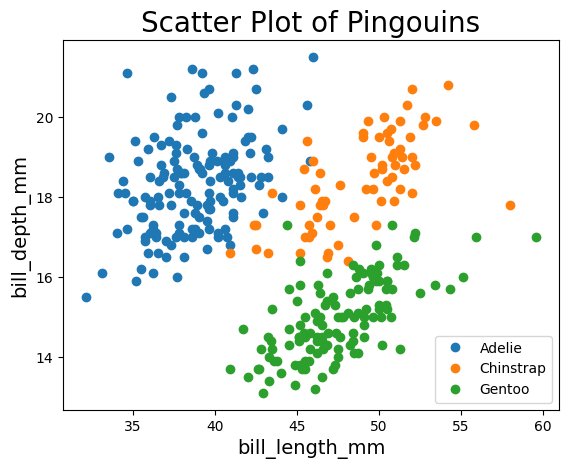

In [51]:
groups = svm_data.groupby('species')
fig, ax = plt.subplots()
for name, group in groups:
  ax.plot(group.bill_length_mm,
          group.bill_depth_mm,
          marker='o',
          linestyle='',
          label=name)
ax.legend(fontsize=10, loc='lower right')
plt.title('Scatter Plot of Pingouins', fontsize=20)
plt.xlabel('bill_length_mm', fontsize=14)
plt.ylabel('bill_depth_mm', fontsize=14)
plt.show()

pairplot으로 해본 결과 여러가지 속성마다 그룹이 생기고 이를 통해 경계를 구분하는 것이 SVM 알고리즘이다.

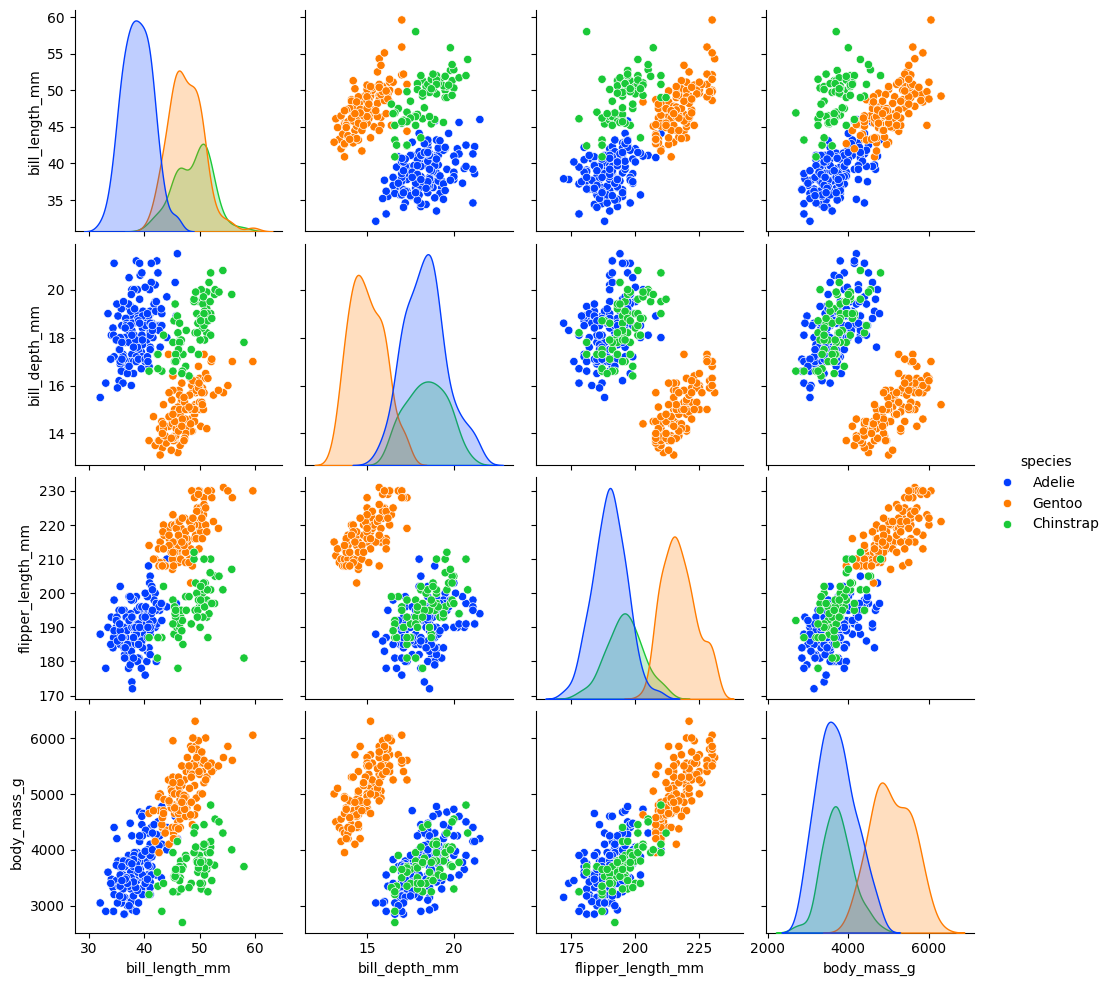

In [53]:
svm_x2 = svm_data.drop(['island','sex'],axis=1)
sns.pairplot(svm_x2, hue='species', palette='bright')

경계를 탐구하기 위해 데이터를 단순화 한다.
종은 턱끈 펭귄을 제외한 아델리 펭귄과 젠투 펭귄만 구성하고
부리의 길이와 너비 속성만 포함한다.

In [60]:
svm_test=svm_data[(svm_data['species'] != 'Chinstrap')]
svm_test=svm_test.drop(['island', 'flipper_length_mm', 'body_mass_g', 'sex'], axis=1)
svm_test.dropna(subset=['bill_length_mm'], inplace=True)
svm_test.tail()

,species,bill_length_mm,bill_depth_mm
270,Gentoo,47.2,13.7
272,Gentoo,46.8,14.3
273,Gentoo,50.4,15.7
274,Gentoo,45.2,14.8
275,Gentoo,49.9,16.1


시각화 결과 두 그룹이 확실하게 나눠진다.

<ipython-input-61-b0fb06bd1b52>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  svm_test=svm_test.replace('Gentoo',1)


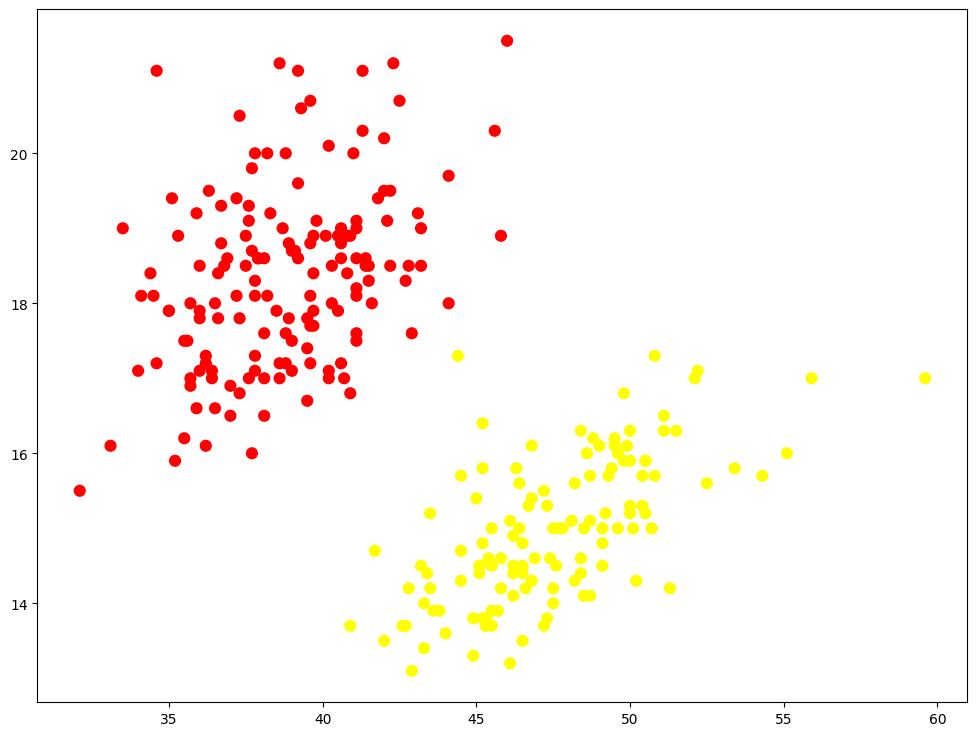

In [61]:
#let's convert categorical values to numerical target
svm_test=svm_test.replace('Adelie',0)
svm_test=svm_test.replace('Gentoo',1)
svm_X=svm_test.iloc[:,1:3]
svm_Y=svm_test['species']
plt.figure(figsize=(12,9))
plt.scatter(svm_X.iloc[:,0], svm_X.iloc[:,1], c=svm_Y, s=60, cmap='autumn')
plt.show()

단순화 된 데이터를 학습하고 서포트 벡터를 확인한다.

In [63]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=10)
model.fit(svm_X, svm_Y)

SVC(C=10, kernel='linear')

In [64]:
model.support_vectors_

array([[44.1, 18. ],
       [44.4, 17.3]])

학습 후 확인한 서포트 벡터를 시각화 한다.

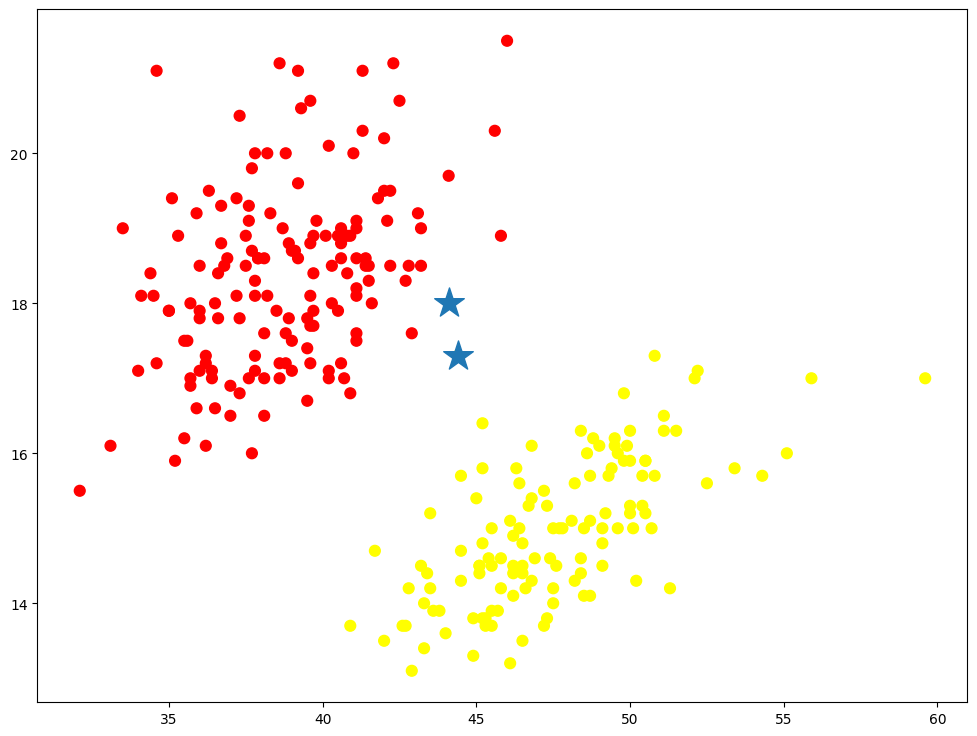

In [66]:
plt.figure(figsize=(12,9))
plt.scatter(svm_X.iloc[:, 0], svm_X.iloc[:,1], c=svm_Y, s=60, cmap='autumn')
plt.scatter(model.support_vectors_[:,0], model.support_vectors_[:,1], s=500, marker='*')
plt.show()

서포트 벡터를 중심으로 경계를 설정하고 그 중간 경계를 시각화 한다.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


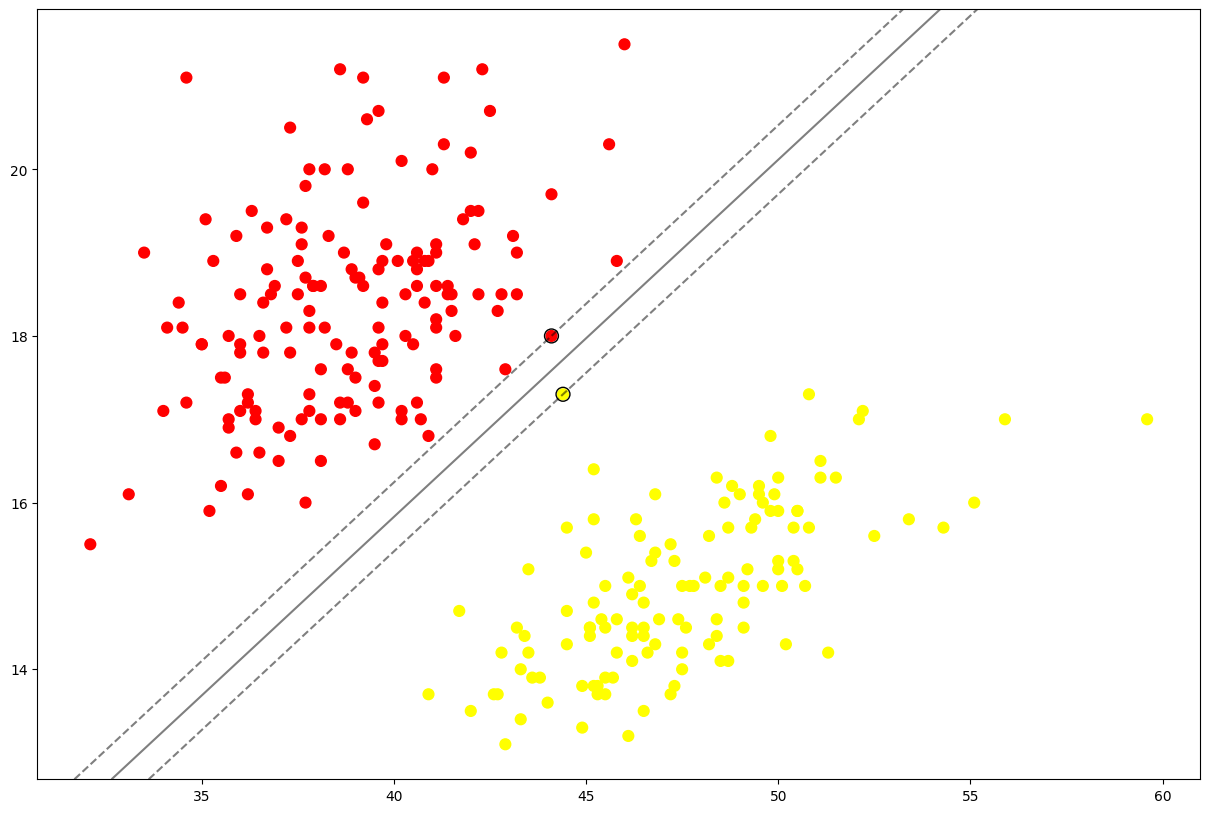

In [67]:
plt.figure(figsize=(15,10))
ax = plt.gca()
plt.scatter(svm_X.iloc[:, 0], svm_X.iloc[:, 1], c=svm_Y, s=60, cmap='autumn')
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()